In [5]:
# Multinomial Classification 문제인 MNIST를 sklearn과 Tensorflow 2.x버전으로
# 구현해 보아요!

# 먼저 sklearn으로 구현해 보아요!

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings(action='ignore') # warning이 출력되지 않아요!

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# 결측치와 이상치를 처리해야 해요!
# feature engineering
# 학습에 필요없는 column(feature)을 삭제, 
# 기존 column들을 이용해서 새로운 column을 생성
# Binning 처리(연속적인 숫자값을 categorical value로 변환)

# display(df.head(),df.shape)

# 독립변수와 종속변수를 분리
x_data = df.drop('label', axis=1, inplace=False)
t_data = df['label']    # one-hot 처리를 안했어요!

# 정규화처리
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data, test_size=0.3, random_state=0)

# sklearn구현으로 가 보아요!
# LogisticRegression은 solver를 지정해야 해요!
# default로 사용되는 solver는 lbfgs라는 solver예요! 
# => 작은 데이터에 최적화 되어있어요! (데이터량이 많아지면 performance가 좋지 않아요!)
# 일반적으로 데이터량이 많은 경우는 
# sag(Stochastic Average Gradient Descent)를 이용하는데
# 이 sag의 확장판이 있어요! => saga

sklearn_model = LogisticRegression(solver='saga')
sklearn_model.fit(x_data_train,t_data_train)
print('sklearn result : ')
print(classification_report(t_data_test,sklearn_model.predict(x_data_test)))


sklearn result : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1242
           1       0.96      0.97      0.97      1429
           2       0.92      0.90      0.91      1276
           3       0.91      0.90      0.90      1298
           4       0.92      0.92      0.92      1236
           5       0.88      0.88      0.88      1119
           6       0.93      0.95      0.94      1243
           7       0.94      0.93      0.93      1334
           8       0.89      0.87      0.88      1204
           9       0.88      0.89      0.89      1219

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [10]:
# Tensorflow 2.x 버전으로 구현해 보아요!

%reset

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings(action='ignore') # warning이 출력되지 않아요!

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# 독립변수와 종속변수를 분리
x_data = df.drop('label', axis=1, inplace=False)
t_data = df['label']    # one-hot 처리를 안했어요
                        # TF1.x버전에서는 one-hot 처리를 해야 해요!
                        # Tf2.x버전에서는 설정만하면 one-hot처리를 안해도 되요! 

# 정규화처리
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data, test_size=0.3, random_state=0)

# Tensorflow 2.X 구현
keras_model = Sequential()   # 모델 생성
keras_model.add(Flatten(input_shape=(x_data_train.shape[1],)))
keras_model.add(Dense(10, activation='softmax'))

keras_model.compile(optimizer=SGD(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['sparse_categorical_accuracy'])

history = keras_model.fit(x_data_train,
                          t_data_train,
                          epochs=100,  # 추후에 history를 이용해서 조절
                          batch_size=512,
                          verbose=0,
                          validation_split=0.2)

print(keras_model.evaluate(x_data_test,t_data_test))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
394/394 [==============================] - 0s 701us/step - loss: 0.2955 - sparse_categorical_accuracy: 0.9175
[0.29545459151268005, 0.9174603223800659]


<class 'dict'>
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


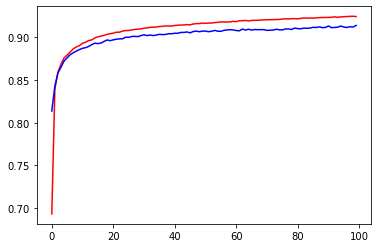

In [18]:
# history객체 내에 history라는 속성이 있어요! => dict
print(type(history.history))
print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'], color='r')  
# epoch당 training data를 이용한 accuracy
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')  
# epoch당 validation data를 이용한 accuracy

plt.show()

In [3]:
# Logistic Regression(Perceptron)
# AND, OR Gate를 학습시켜서 Prediction할 수 있는가?
# Tensorflow 1.15로 구현해서 알아보아요!
# 진리표(Truth Table)를 학습하고 예측을 정확하게 하는지 알아보아요!

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

# AND t_data
t_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss 
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X:x_data,
                                                     T:t_data})
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

AttributeError: module 'tensorflow' has no attribute 'placeholder'